## VaR em 1 minuto

In [155]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime  
import numpy as np
import plotly.express as px
import seaborn as sns       

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['figure.constrained_layout.use'] = True
plt.style.use('default')

C:\Users\loren\AppData\Local\Temp\ipykernel_21608\2501528228.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [156]:
ibov = pd.DataFrame(
    yf.download('^BVSP', start='2003-01-01',end='2023-12-31'))

# Retornos diários da série de preço ajustado
retornos_ibov = ibov['Adj Close'].pct_change().dropna()*100
retornos_ibov

[*********************100%***********************]  1 of 1 completed


Date
2003-01-03   -0.025855
2003-01-06    3.620690
2003-01-07   -1.198003
2003-01-08   -0.757831
2003-01-09    1.069065
                ...   
2023-12-21    1.053485
2023-12-22    0.431980
2023-12-26    0.587557
2023-12-27    0.495009
2023-12-28   -0.006707
Name: Adj Close, Length: 5197, dtype: float64

In [157]:
retornos_ibov

Date
2003-01-03   -0.025855
2003-01-06    3.620690
2003-01-07   -1.198003
2003-01-08   -0.757831
2003-01-09    1.069065
                ...   
2023-12-21    1.053485
2023-12-22    0.431980
2023-12-26    0.587557
2023-12-27    0.495009
2023-12-28   -0.006707
Name: Adj Close, Length: 5197, dtype: float64

In [158]:
mean = round(retornos_ibov.mean(),2)
mean

0.06

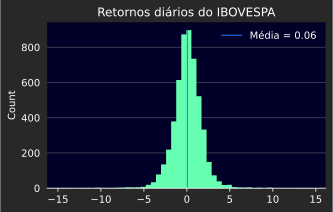

In [159]:
fig, ax = plt.subplots(1,1, figsize=(5,3), facecolor='#282828', edgecolor='white')
ax.set_facecolor('#000028')

plt.hist(retornos_ibov, bins=50, histtype="stepfilled", color='#66ffb2')
ax.axvline(mean, color='#2277ff', linewidth=1, label=f'Média = {mean}', ymax=0.95)
ax.legend(frameon=False, labelcolor='#ffffff')

ax.set_ylabel('Count').set_color('#ffffff')
ax.set_title('Retornos diários do IBOVESPA').set_color('#ffffff')
ax.spines['bottom'].set_color('#ffffff')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', colors='#ffffff')
ax.tick_params(axis='y', colors='#ffffff')
ax.grid(alpha=.4, axis='y')
ax.set_axisbelow(True)
ax.tick_params(left=False)

In [160]:
var95 = round(
    retornos_ibov.quantile(1-0.95),
      2)
var95

-2.57

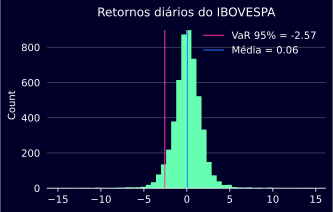

In [161]:
fig, ax = plt.subplots(1,1, figsize=(5,3), facecolor='#000028', edgecolor='white')
ax.set_facecolor('#000028')

plt.hist(retornos_ibov, bins=50, histtype="stepfilled", color='#66ffb2')

ax.axvline(var5, color='#ff3399', linewidth=1, label=f'VaR 95% = {var5}', ymax=0.95)
ax.axvline(mean, color='#2277ff', linewidth=1, label=f'Média = {mean}', ymax=0.95)
ax.legend(frameon=False, labelcolor='#ffffff')

ax.set_ylabel('Count').set_color('#ffffff')
ax.set_title('Retornos diários do IBOVESPA').set_color('#ffffff')
ax.spines['bottom'].set_color('#ffffff')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', colors='#ffffff')
ax.tick_params(axis='y', colors='#ffffff')
ax.grid(alpha=0.4, axis='y')
ax.set_axisbelow(True)
ax.tick_params(left=False)

In [162]:
cvar95 = round(
    np.nanmean(
        retornos_ibov[retornos_ibov < var95]
        ),2)
cvar95

-3.82

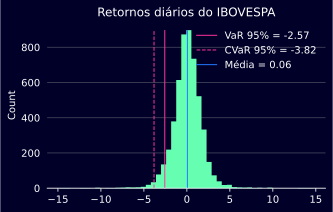

In [163]:
fig, ax = plt.subplots(1,1, figsize=(5,3), facecolor='#000028', edgecolor='white')
ax.set_facecolor('#000028')

plt.hist(retornos_ibov, bins=50, histtype="stepfilled", color='#66ffb2')

ax.axvline(var5, color='#ff3399', linewidth=1, label=f'VaR 95% = {var5}', ymax=0.95)
ax.axvline(cvar5, color='#ff3399', linewidth=1, linestyle='dashed', label=f'CVaR 95% = {cvar5}', ymax=0.95)
ax.axvline(mean, color='#2277ff', linewidth=1, label=f'Média = {mean}', ymax=0.95)
ax.legend(frameon=False, labelcolor='#ffffff')

ax.set_ylabel('Count').set_color('#ffffff')
ax.set_title('Retornos diários do IBOVESPA').set_color('#ffffff')
ax.spines['bottom'].set_color('#ffffff')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', colors='#ffffff')
ax.tick_params(axis='y', colors='#ffffff')
ax.grid(alpha=0.4, axis='y')
ax.set_axisbelow(True)
ax.tick_params(left=False)
